###Data Scientist Recruitment Challenge###

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [18]:
data=pd.read_parquet('transactions.parquet')
data.to_csv('transcation.csv')


In [19]:
missing_values = data.isnull().sum()
missing_values

Shop                         0
Order_Date_FK                0
ProductCode                  0
OriginalSaleAmountInclVAT    0
CustomerID                   0
SaleDocumentNumber           0
Returned                     0
RevenueInclVAT               0
CostPriceExclVAT             0
BrandName                    0
ModelGroup                   0
ProductGroup                 0
dtype: int64

In [20]:
data[data.duplicated]


,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
6,15,20210730,9221523181585526717,59.95,7033964597104594686,23995798,0,44.96,16.994261,-1657270726128381662,-4124706989267335995,-453682476182549203
34,43,20210730,7365696608474774967,79.95,3911904657826280281,23995819,0,43.97,27.672455,4614247681931237507,-4124706989267335995,-453682476182549203
64,86,20210730,-7570162018175251999,59.95,7377392696430857348,23995847,0,59.95,20.920708,-3001169043836376081,-4124706989267335995,-453682476182549203
134,63,20210730,1259293089820910665,89.95,3502066712742891756,23995902,0,67.46,33.358292,3694837121284491212,3162564956579801398,-453682476182549203
195,46,20210730,-6417061694869180234,65.95,7147211954342663513,23995944,0,42.87,24.767855,7163298684789717024,3162564956579801398,-453682476182549203
...,...,...,...,...,...,...,...,...,...,...,...,...
1759884,79,20210730,-745373077535329727,120.00,-299104793296959079,23995789,0,78.00,38.390231,4614247681931237507,-4124706989267335995,-453682476182549203
1759885,79,20210730,-2694142533085979238,8.50,-299104793296959079,23995789,0,8.50,2.328775,-8892132782483441489,-2426224035638420213,5965103661511607192
1759886,79,20210730,-745373077535329727,120.00,-299104793296959079,23995789,0,78.00,38.390231,4614247681931237507,-4124706989267335995,-453682476182549203
1759887,60,20210730,1659237309319929690,65.95,-4340188327539121409,23995790,0,42.87,22.288649,-4445228402666777776,3162564956579801398,-453682476182549203


In [21]:
# Remove duplicated rows
#cleaned_data = data.drop_duplicates()

# Save cleaned DataFrame to a new file
#cleaned_data.to_csv("cleaned_data.csv", index=False)

In [22]:
#cleaned_data.count()

In [23]:
# Data preprocessing
X = data.drop(columns=["Returned", "SaleDocumentNumber"])
y = data["Returned"]

In [24]:
X.count()

Shop                         1759889
Order_Date_FK                1759889
ProductCode                  1759889
OriginalSaleAmountInclVAT    1759889
CustomerID                   1759889
RevenueInclVAT               1759889
CostPriceExclVAT             1759889
BrandName                    1759889
ModelGroup                   1759889
ProductGroup                 1759889
dtype: int64

In [25]:
#cleaned_data.count()


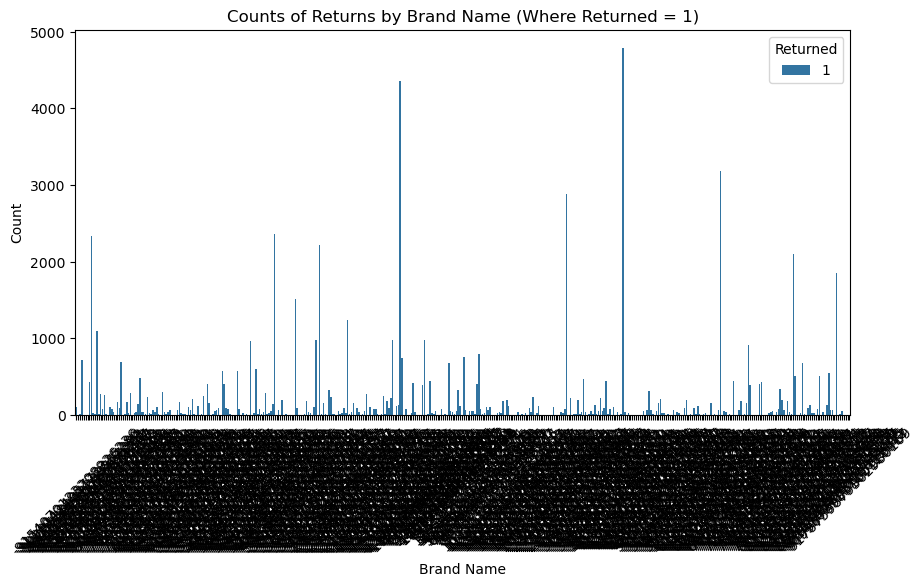

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(x='BrandName', hue='Returned', data=data[data['Returned'] == 1])
plt.title('Counts of Returns by Brand Name (Where Returned = 1)')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Returned', loc='upper right')
plt.savefig('returns_by_Brand_Name_Returned_1.png')
plt.show()

In [27]:
converted_data=pd.read_csv('converted_dataset.csv')

In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv("converted_dataset.csv")

# Count the instances for each class
class_counts = data['Returned'].value_counts()

# Calculate the class distribution
class_distribution = class_counts / data.shape[0]

print("Class Distribution:")
print(class_distribution)


Class Distribution:
Returned
0    0.8927
1    0.1073
Name: count, dtype: float64


Class Distribution After SMOTE:
Returned
0    0.5
1    0.5
Name: proportion, dtype: float64


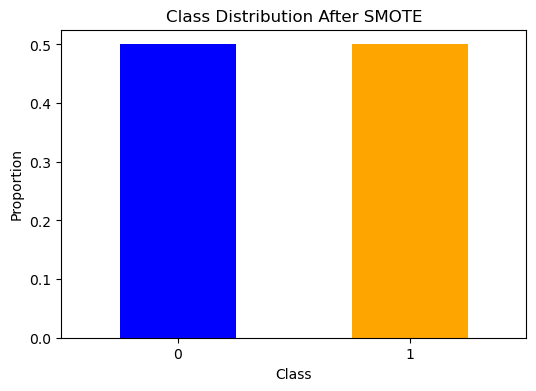

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from category_encoders import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import time
import matplotlib.pyplot as plt

# Load the modified dataset
data = pd.read_csv("converted_dataset.csv")

# Prepare data for predictive modeling
X = data.drop(columns=["Returned", "SaleDocumentNumber", "CustomerID"])
y = data['Returned']

# Encode categorical variables
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Convert resampled data to DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Returned'] = y_resampled

# Calculate class distribution after SMOTE
class_distribution_after_smote = resampled_data['Returned'].value_counts(normalize=True)

# Print class distribution
print("Class Distribution After SMOTE:")
print(class_distribution_after_smote)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
class_distribution_after_smote.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [30]:
# Filter the DataFrame to include only rows where 'Returned' is equal to 1
filtered_data = converted_data[converted_data['Returned'] == 1]

# Save the filtered DataFrame to a CSV file
filtered_data.to_csv('returns_data.csv', index=False)

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420)


In [32]:


# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=69420)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))





ValueError: could not convert string to float: 'Shop_51'

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(random_state=69420)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9750921932620789
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    338351
           1       0.78      0.50      0.61     13627

    accuracy                           0.98    351978
   macro avg       0.88      0.75      0.80    351978
weighted avg       0.97      0.98      0.97    351978



In [ ]:
# Count occurrences of each Customer ID
customer_id_counts = data['CustomerID'].value_counts()

# Filter for repeated Customer IDs (occurrences > 1)
repeated_customer_ids = customer_id_counts[customer_id_counts > 1]
repeated_customer_ids.to_csv('repeated_customer_ids')
print("Repeated Customer IDs:")
print(repeated_customer_ids)

Repeated Customer IDs:
CustomerID
-5287955982418449235    54277
-4279123115125507326     7961
 4572026730515361595     7602
 6455628090489614628     7022
-5274373356868953113     6634
                        ...  
 1301385899391441305        2
 427892873201715831         2
-6290233012019054067        2
-6233156371913218497        2
 6228876290867994363        2
Name: count, Length: 327635, dtype: int64


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming y_true and y_pred are the true labels and predicted probabilities for a binary classification problem
# y_pred should contain predicted probabilities of the positive class
auc = roc_auc_score(y_test, y_pred_dt)
print(f'AUC: {auc}')

AUC: 0.7706523684664913


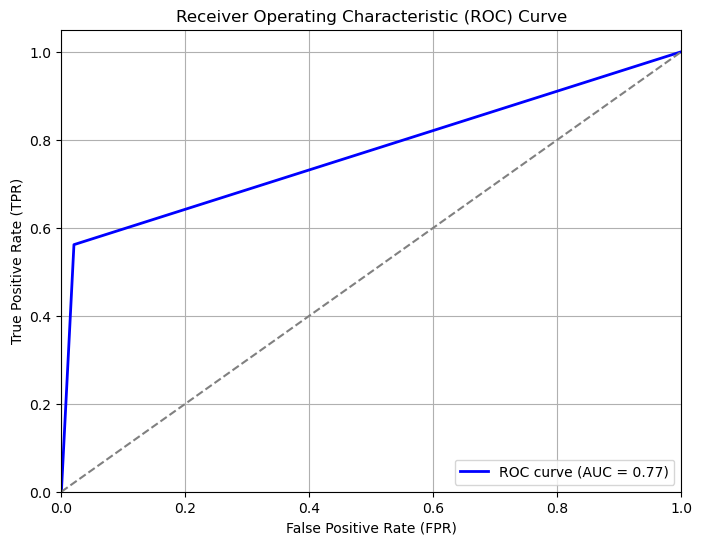

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

         Unnamed: 0  Order_Date_FK   ProductCode  OriginalSaleAmountInclVAT  \
count  1.895479e+06   1.895479e+06  1.895479e+06               1.895479e+06   
mean   8.955185e+05   2.021068e+07 -1.972528e+16               6.024183e+01   
std    5.107707e+05   6.679578e+01  5.335078e+18               3.204388e+01   
min    0.000000e+00   2.021060e+07 -9.222763e+18               2.950000e+00   
25%    4.514895e+05   2.021062e+07 -4.516842e+18               3.995000e+01   
50%    9.013230e+05   2.021070e+07 -1.032942e+17               5.995000e+01   
75%    1.352550e+06   2.021072e+07  4.618717e+18               7.995000e+01   
max    1.759888e+06   2.021082e+07  9.222222e+18               2.500000e+02   

         CustomerID  SaleDocumentNumber      Returned  RevenueInclVAT  \
count  1.895479e+06        1.895479e+06  1.895479e+06    1.895479e+06   
mean  -1.638755e+17        2.377009e+07  1.073001e-01    4.949792e+01   
std    5.363264e+18        1.929636e+05  3.094944e-01    2.644097e+01

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


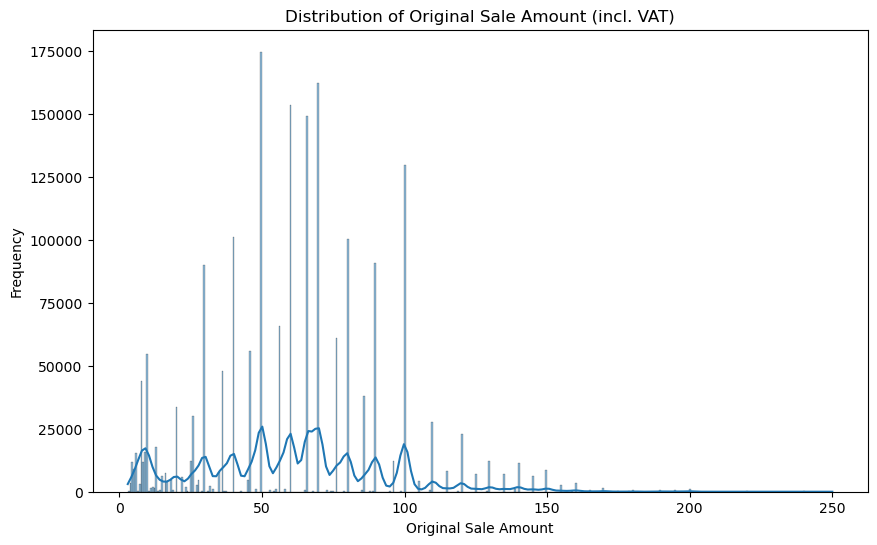

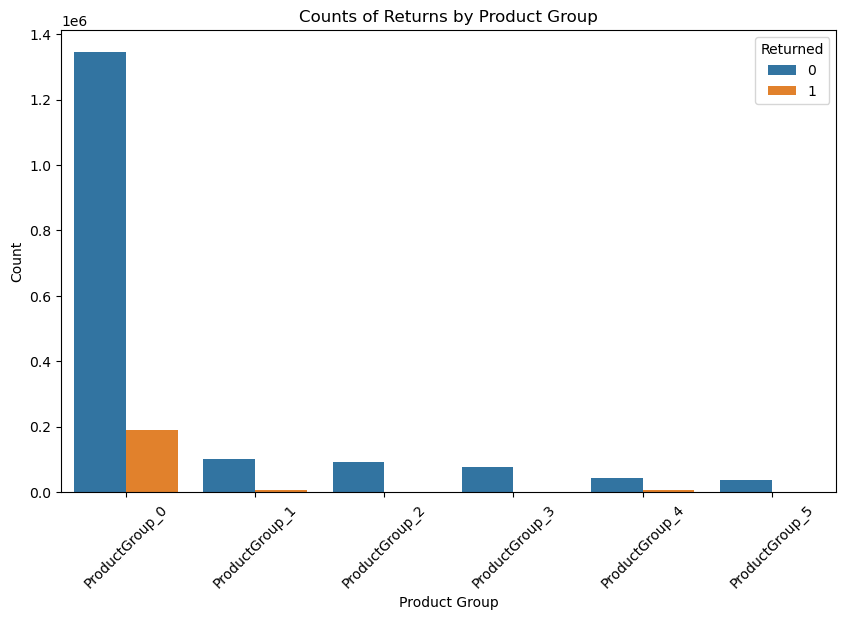

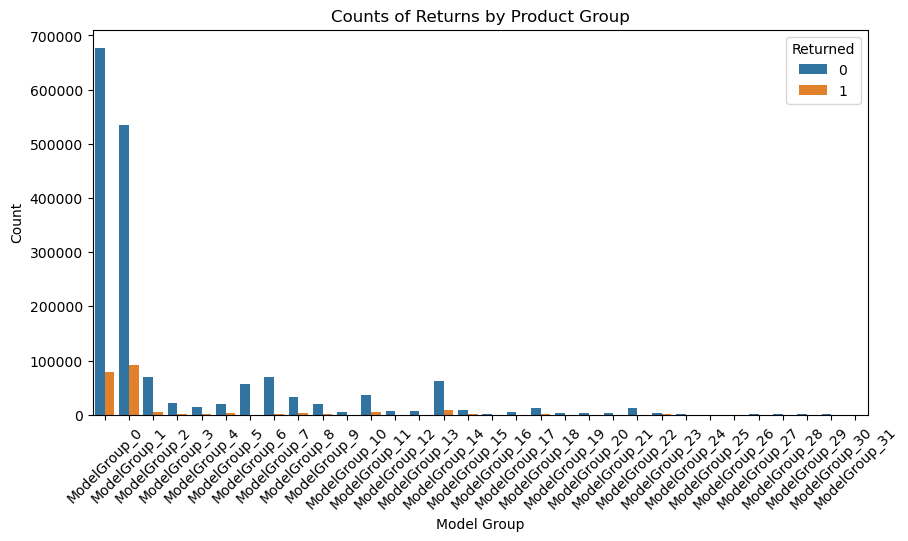

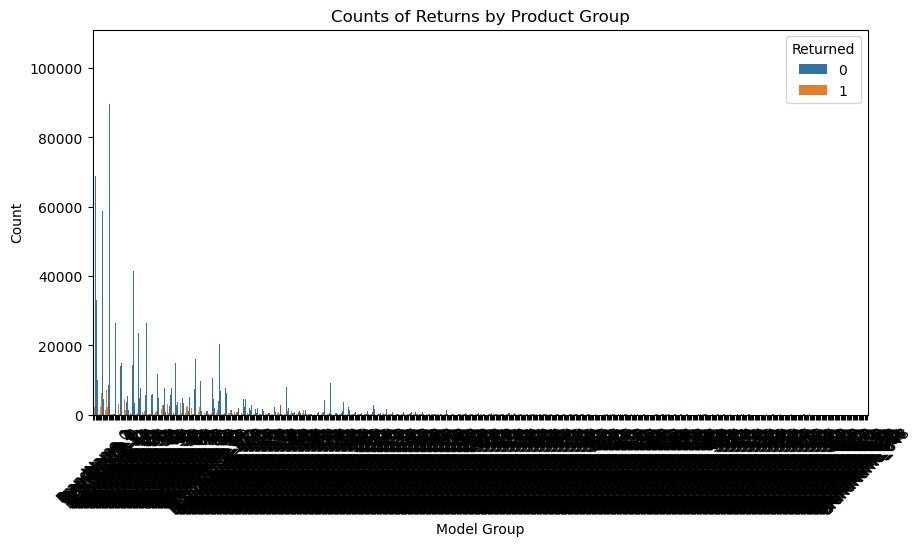

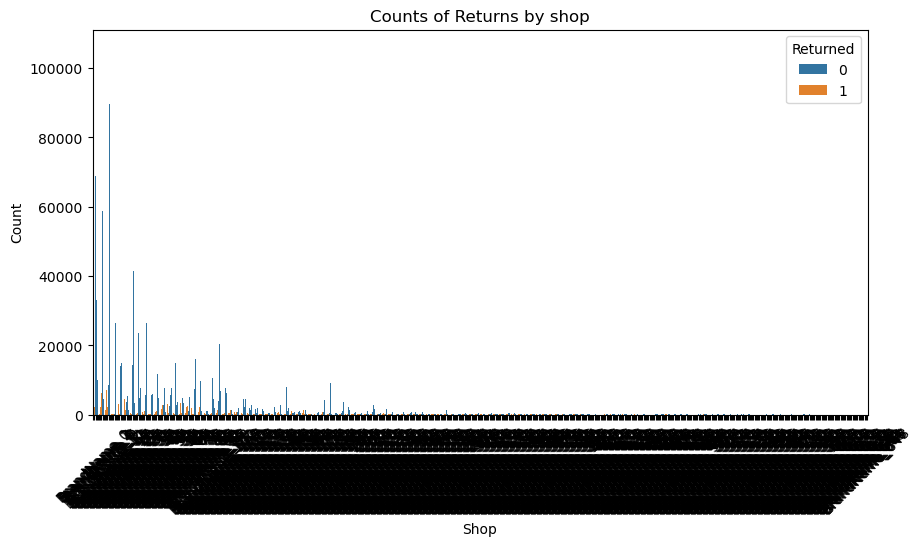

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("converted_dataset.csv")

# Exploratory Data Analysis (EDA)
# Summary statistics
print(data.describe())

# Visualizations
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['OriginalSaleAmountInclVAT'], kde=True)
plt.title('Distribution of Original Sale Amount (incl. VAT)')
plt.xlabel('Original Sale Amount')
plt.ylabel('Frequency')
plt.savefig('original_sale_amount_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='ProductGroup', hue='Returned', data=data)
plt.title('Counts of Returns by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Returned', loc='upper right')
plt.savefig('returns_by_product_group.png')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='ModelGroup', hue='Returned', data=data)
plt.title('Counts of Returns by Product Group')
plt.xlabel('Model Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Returned', loc='upper right')
plt.savefig('returns_by_Model_group.png')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='BrandName', hue='Returned', data=data)
plt.title('Counts of Returns by Product Group')
plt.xlabel('Model Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Returned', loc='upper right')
plt.savefig('returns_by_Model_group.png')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='BrandName', hue='Returned', data=data)
plt.title('Counts of Returns by shop')
plt.xlabel('Shop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Returned', loc='upper right')
plt.savefig('returns_by_Model_group.png')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

# Load the dataset
data = pd.read_csv("transcation.csv")

# Filter rows with 'Returned' value of 1 and duplicate them twice
returned_rows = data[data['Returned'] == 1]
duplicated_rows = pd.concat([returned_rows] * 2, ignore_index=True)

# Concatenate the original DataFrame with the duplicated rows
duplicated_data = pd.concat([data, duplicated_rows], ignore_index=True)

# Shuffle the resulting DataFrame
shuffled_data = shuffle(duplicated_data)

# Save the shuffled DataFrame
shuffled_data.to_csv("shuffled_duplicated_transcation.csv", index=False)

def automatic_numerical_to_categorical(data, columns):
    """
    Automatically convert specified numerical encoded categorical variables back to their original categorical form.
    
    Args:
    - data (DataFrame): Input DataFrame containing numerical encoded categorical variables.
    - columns (list): List of column names to convert back to categorical form.
    
    Returns:
    - DataFrame: DataFrame with specified numerical encoded columns converted back to categorical form.
    """
    converted_data = data.copy()
    for col in columns:
        unique_values = converted_data[col].unique()
        mapping = {val: f'{col}_{i}' for i, val in enumerate(unique_values)}
        converted_data[col] = converted_data[col].map(mapping)
    return converted_data

# Load the dataset
data = pd.read_csv("shuffled_duplicated_transcation.csv")

# Specify the columns to convert back to categorical form
columns_to_convert = ["BrandName", "ModelGroup", "ProductGroup","Shop"]

# Convert specified numerical encoded columns back to categorical form
converted_data = automatic_numerical_to_categorical(data, columns_to_convert)

# Save the modified dataset with specified columns converted back to their original form
converted_data.to_csv("converted_dataset.csv", index=False)



In [ ]:
# Load the modified dataset
data = pd.read_csv("converted_dataset.csv")

# Prepare data for predictive modeling
X = data.drop(columns=["Returned", "SaleDocumentNumber", "CustomerID"])
y = data['Returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the columns that were converted to categorical variables
categorical_columns = ['BrandName', 'ModelGroup', 'ProductGroup']

# Initialize OneHotEncoder with drop='first' and handle_unknown='ignore'
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Apply OneHotEncoder to the specified categorical columns
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = onehot_encoder.transform(X_test[categorical_columns])

print(X_test_encoded)


  (0, 222)	1.0
  (0, 641)	1.0
  (0, 672)	1.0
  (1, 69)	1.0
  (1, 669)	1.0
  (1, 672)	1.0
  (2, 111)	1.0
  (2, 663)	1.0
  (2, 672)	1.0
  (3, 624)	1.0
  (3, 668)	1.0
  (3, 672)	1.0
  (4, 551)	1.0
  (4, 648)	1.0
  (4, 674)	1.0
  (5, 5)	1.0
  (5, 647)	1.0
  (5, 676)	1.0
  (6, 5)	1.0
  (6, 647)	1.0
  (6, 676)	1.0
  (7, 345)	1.0
  (7, 647)	1.0
  (7, 676)	1.0
  (8, 118)	1.0
  :	:
  (379087, 672)	1.0
  (379088, 30)	1.0
  (379088, 641)	1.0
  (379088, 672)	1.0
  (379089, 112)	1.0
  (379089, 641)	1.0
  (379089, 672)	1.0
  (379090, 604)	1.0
  (379090, 663)	1.0
  (379090, 672)	1.0
  (379091, 622)	1.0
  (379091, 663)	1.0
  (379091, 672)	1.0
  (379092, 112)	1.0
  (379092, 641)	1.0
  (379092, 672)	1.0
  (379093, 211)	1.0
  (379093, 641)	1.0
  (379093, 672)	1.0
  (379094, 619)	1.0
  (379094, 641)	1.0
  (379094, 672)	1.0
  (379095, 572)	1.0
  (379095, 669)	1.0
  (379095, 672)	1.0


c:\Users\nithy\anaconda3\ana\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Decision Tree model
y_pred = dt_model.predict(X_test_encoded)
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
import pickle

# Load the modified dataset
data = pd.read_csv("converted_dataset.csv")

# Prepare data for predictive modeling
X = data.drop(columns=["Returned", "SaleDocumentNumber", "CustomerID"])
y = data['Returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the columns that were converted to categorical variables
categorical_columns = ['BrandName', 'ModelGroup', 'ProductGroup', "Shop"]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(cols=categorical_columns)

# Apply OrdinalEncoder to the specified categorical columns
X_train_encoded = ordinal_encoder.fit_transform(X_train, y_train)
X_test_encoded = ordinal_encoder.transform(X_test)

# Train Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Predict
y_pred = model.predict(X_test_encoded)

# Evaluate
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")




Decision Tree:
Accuracy: 0.968812649038766
Precision: 0.7856760772659732
Recall: 0.9752840489892283
F1-score: 0.8702722275255933
Confusion Matrix:
[[327616  10818]
 [  1005  39657]]


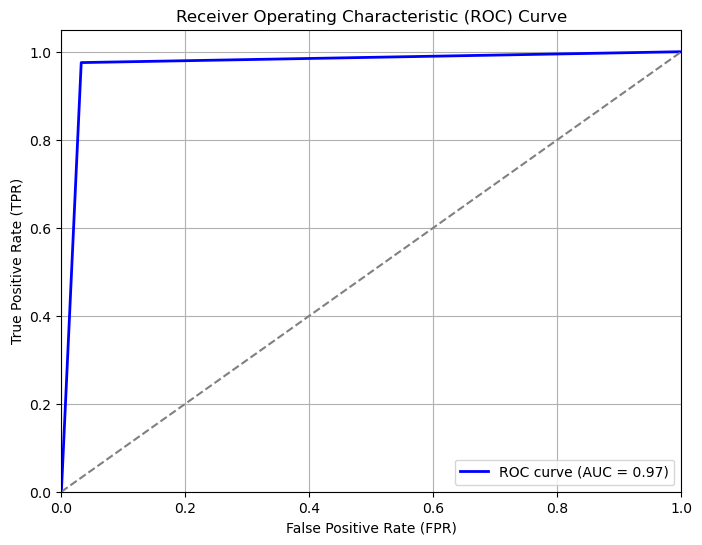

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
pip show scikit-learn


Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\nithy\anaconda3\ana\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import gzip

# Load your CSV file
data = pd.read_csv("converted_dataset.csv")

# Specify the compressed file name
compressed_file_name = "converted_dataset.csv.gz"

# Save the DataFrame to a compressed CSV file
with gzip.open(compressed_file_name, "wt", compresslevel=9) as f:
    data.to_csv(f, index=False)

Decision Tree:
Accuracy: 0.968812649038766
Precision: 0.7856760772659732
Recall: 0.9752840489892283
F1-score: 0.8702722275255933
Confusion Matrix:
[[327616  10818]
 [  1005  39657]]


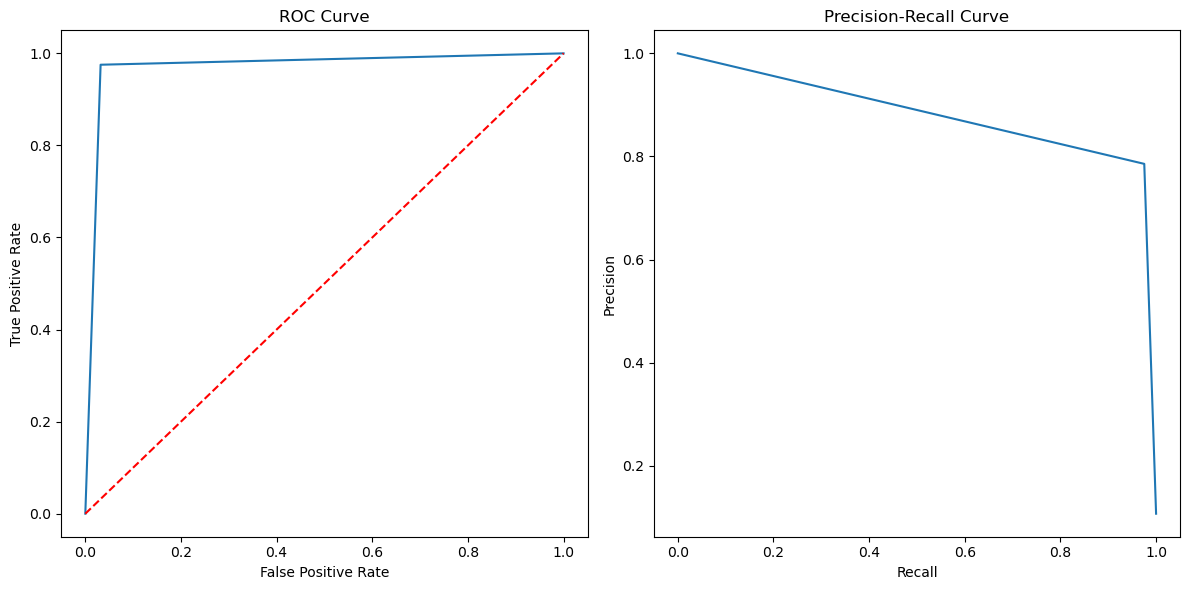

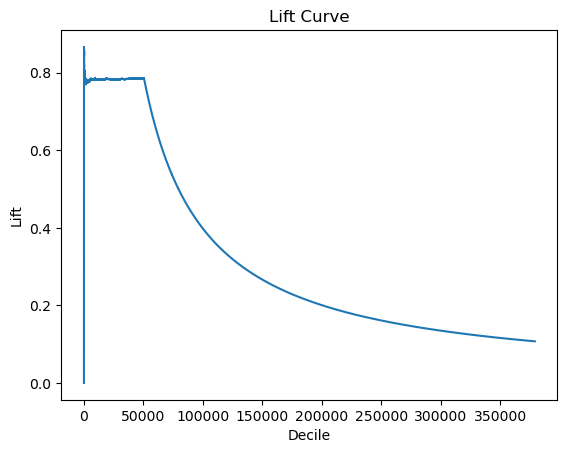

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve
from category_encoders import OrdinalEncoder
import matplotlib.pyplot as plt

# Load the modified dataset
data = pd.read_csv("converted_dataset.csv")

# Prepare data for predictive modeling
X = data.drop(columns=["Returned", "SaleDocumentNumber", "CustomerID"])
y = data['Returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the columns that were converted to categorical variables
categorical_columns = ['BrandName', 'ModelGroup', 'ProductGroup', "Shop"]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(cols=categorical_columns)

# Apply OrdinalEncoder to the specified categorical columns
X_train_encoded = ordinal_encoder.fit_transform(X_train, y_train)
X_test_encoded = ordinal_encoder.transform(X_test)

# Train Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Predict
y_pred = model.predict(X_test_encoded)

# Predict probabilities
y_proba = model.predict_proba(X_test_encoded)[:, 1]

# Evaluate
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Plot ROC Curve
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
ax[0].plot(fpr, tpr)
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')  # Plot the diagonal line for reference
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ax[1].plot(recall, precision)
ax[1].set_title('Precision-Recall Curve')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()

# Plot Lift Curve
results_df = pd.DataFrame({'y_true': y_test, 'y_proba': y_proba})
results_df = results_df.sort_values(by='y_proba', ascending=False).reset_index(drop=True)
results_df['cumulative_positives'] = results_df['y_true'].cumsum()
results_df['lift'] = results_df['cumulative_positives'] / (results_df.index + 1)

plt.plot(results_df.index, results_df['lift'])
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.show()
